Write a program that simulates an Ising model with 200 × 200 cells. Initialize the spins randomly with an equal probability of being set to +1 or −1. At each step, randomly pick 10% of the atoms in the lattice and update their states by following the Monte Carlo method.

a) Plot some snapshots of the binary spin map of the material. Repeat the same numerical experiment for various temperatures T while the external magnetic field is absent (H = 0). Observe the clustering of certain magnetic domains at low temperatures and the more random texture of the lattice at higher temperatures. [Hint: See figure 2.3.]

b) This system has a critical temperature of T = 2.269. Simulate the different behaviors at subcritical and supercritical temperatures and critically analyze the differences between them. [Hint: See first and last row in figure 2.3.]

100%|██████████| 100001/100001 [00:28<00:00, 3508.66it/s]


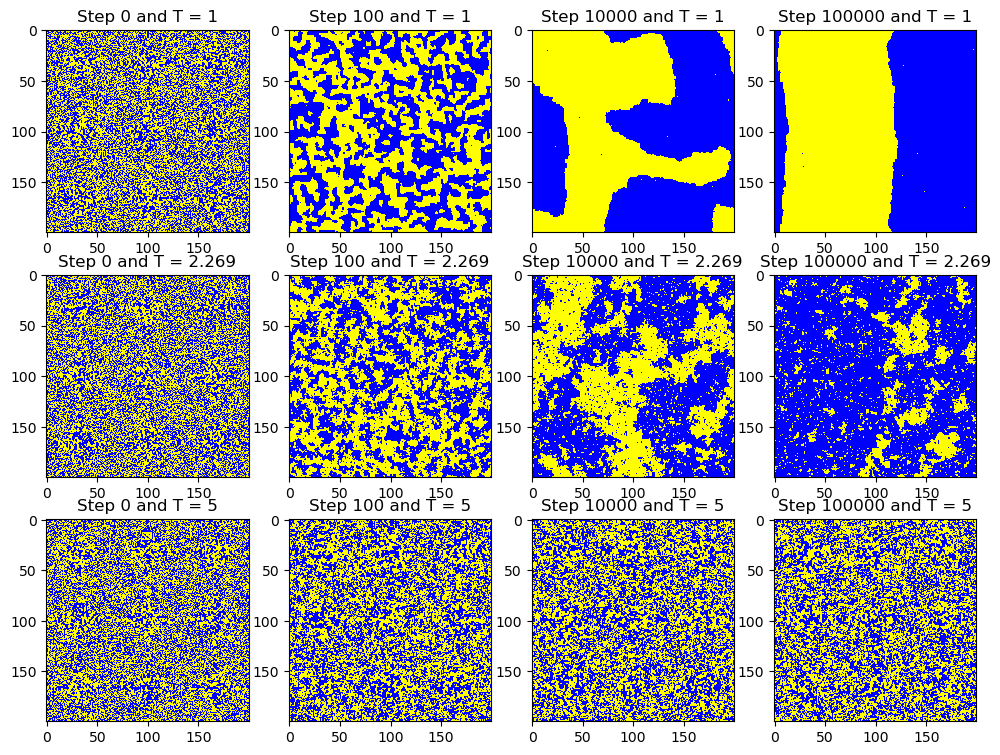

In [144]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import trange

tenPercent = int(200 * 200 * 0.1)
steps = 10 ** 5 + 1
T = [1,2.269,5]
fig, ax = plt.subplots(3, 4, figsize=(12,9))

cmap = plt.cm.colors.ListedColormap(['yellow', 'blue'])
positionCounter = 0
for temp in range(len(T)):
    # Lattice size 200x200 with random spin -1 and 1
    lattice = np.random.choice([-1, 1], size=(200, 200))
    beta = 1/T[temp]
    
    for k in trange(steps):
        
        if k in [0, 100, 10000, 100000]:
            positionCounter += 1
            plt.subplot(3, 4, positionCounter)
            plt.imshow(lattice, cmap=cmap)
            plt.title(f'Step {k} and T = {T[temp]}')
            

        # Generate random positions in one go
        i = np.random.randint(0, 200, size=tenPercent)
        j = np.random.randint(0, 200, size=tenPercent)

        iRight = (i + 1) % 200
        iLeft = (i - 1) % 200
        jUp = (j + 1) % 200
        jDown = (j - 1) % 200

        randPosition = lattice[i, j]

        neighbourOne = lattice[iLeft, j]
        neighbourTwo = lattice[iRight, j]
        neighbourThree = lattice[i, jUp]
        neighbourFour = lattice[i, jDown]

        M = neighbourOne + neighbourTwo + neighbourThree + neighbourFour

        r = np.random.uniform(0, 1, size=tenPercent)

        spinUp = np.exp(beta * M) / (np.exp(beta * M) + np.exp(-beta * M))

        newState = np.where(r < spinUp, 1, -1)

        lattice[i, j] = newState

plt.show()

In this plot task a) and b) are answered. In the first row the temperature is subcritical. In the second row the temperature is exactly critical and in the third row the temperature is supercritical. The subcritical system finds it self in a reinforcing mechanism, which leads to large regions of the same spin. The opposite happens for supercritical temperatures, here the alignement of spins is random because the beta factor $\beta = 1/T$ becomes small and thus the probability of not changing the state is higher. 

c) Show that the 2D Ising model behaves like a paramagnetic material at higher temperatures (e.g., T = 5).

100%|██████████| 100001/100001 [00:25<00:00, 3971.84it/s]


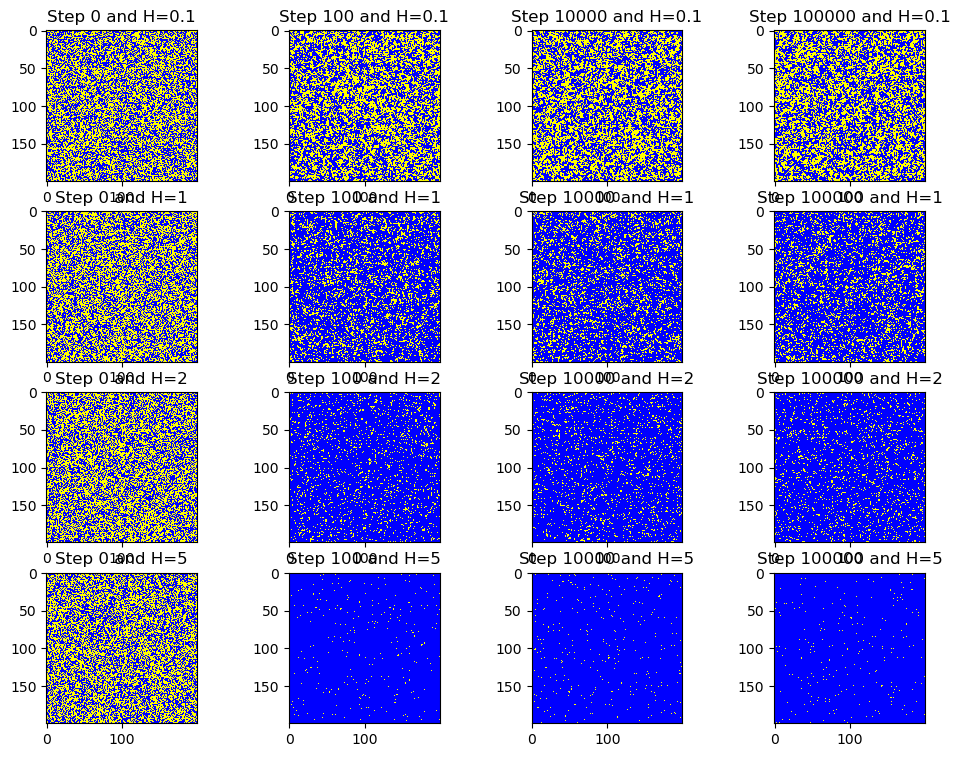

In [145]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import trange

tenPercent = int(200 * 200 * 0.1)
steps = 10 ** 5 + 1
T = 5
beta = 1/T
Hs = [0.1,1,2,5]
fig, ax = plt.subplots(4, 4, figsize=(12,9))

cmap = plt.cm.colors.ListedColormap(['yellow', 'blue'])
positionCounter = 0

for h in range(len(Hs)):
    # Lattice size 200x200 with random spin -1 and 1
    lattice = np.random.choice([-1, 1], size=(200, 200))
    H = Hs[h]

    for k in trange(steps):
        if k in [0, 100, 10000, 100000]:
            positionCounter += 1
            plt.subplot(4, 4, positionCounter)
            plt.imshow(lattice, cmap=cmap)
            plt.title(f'Step {k} and H={H}')
            

        # Generate random positions in one go
        i = np.random.randint(0, 200, size=tenPercent)
        j = np.random.randint(0, 200, size=tenPercent)

        iRight = (i + 1) % 200
        iLeft = (i - 1) % 200
        jUp = (j + 1) % 200
        jDown = (j - 1) % 200

        randPosition = lattice[i, j]

        neighbourOne = lattice[iLeft, j]
        neighbourTwo = lattice[iRight, j]
        neighbourThree = lattice[i, jUp]
        neighbourFour = lattice[i, jDown]

        M = neighbourOne + neighbourTwo + neighbourThree + neighbourFour

        r = np.random.uniform(0, 1, size=tenPercent)

        spinUp = np.exp(beta * (H+M)) / (np.exp(beta * (H+M)) + np.exp(-beta *(H+M)))

        newState = np.where(r < spinUp, 1, -1)

        lattice[i, j] = newState
    

plt.show()


Here one can see that as soon as an external magnetic field H is taken into account, one of the spin states shows up more often, which is represented in the plots. In low temperatures the influence of the external magnetic field is overwhelming, while for higher temperatures there is still a tiny amount of apparent randomness of the spins present, but much has aligned with the external magnetic field H. 

d) Calculate the total magnetization of this system as a function of H. Show that, for small values of H, the magnetization density of the system scales according to m = χH, where χ is the magnetic susceptibility. Calculate χ. $m = \frac{1}{N^2}\sum_{i,j}\sigma_{i,j}$

The slope is 0.1>0, thus the suceptibility of the modeled material is paramagnetic.


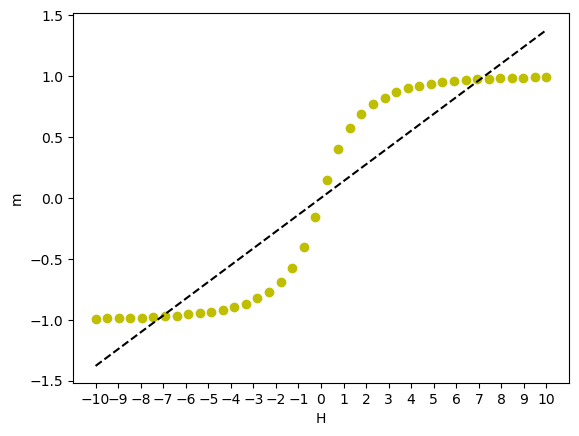

In [149]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import trange

tenPercent = int(200 * 200 * 0.1)
steps = 10 ** 3
T = 5
beta = 1/T
Hs = np.linspace(-10,10,40)

mlist = []

for h in range(len(Hs)):
    # Lattice size 200x200 with random spin -1 and 1
    lattice = np.random.choice([-1, 1], size=(200, 200))
    H = Hs[h]

    for k in range(steps):
        # Generate random positions in one go
        i = np.random.randint(0, 200, size=tenPercent)
        j = np.random.randint(0, 200, size=tenPercent)

        iRight = (i + 1) % 200
        iLeft = (i - 1) % 200
        jUp = (j + 1) % 200
        jDown = (j - 1) % 200

        randPosition = lattice[i, j]

        neighbourOne = lattice[iLeft, j]
        neighbourTwo = lattice[iRight, j]
        neighbourThree = lattice[i, jUp]
        neighbourFour = lattice[i, jDown]

        M = neighbourOne + neighbourTwo + neighbourThree + neighbourFour

        r = np.random.uniform(0, 1, size=tenPercent)

        spinUp = np.exp(beta * (H+M)) / (np.exp(beta * (H+M)) + np.exp(-beta *(H+M)))

        newState = np.where(r < spinUp, 1, -1)

        lattice[i, j] = newState
    
    m = (1/200**2)*np.sum(lattice)
    m = mlist.append(m)
    





slope, intercept = np.polyfit(Hs,mlist,1)
print(f'The slope is {slope:.001}>0, thus the suceptibility of the modeled material is paramagnetic.')
coef = np.polyfit(Hs,mlist,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(Hs,mlist, 'yo', Hs, poly1d_fn(Hs), '--k')
plt.xlabel('H')
plt.xticks([-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10])
plt.ylabel('m')
plt.show()


In this plot one is able to read of the slope of the simulated magnetic suceptibility. It is clearly positive, $\chi > 0$, which is a definition of paramagnetism. Also note, that the plot recembles a sigmoid function.